In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from keras import backend as K 
from unidecode import unidecode
import optuna
pd.set_option('display.max_columns', None)
import warnings 
import re
warnings.filterwarnings('ignore')
from langdetect import detect 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from transformers import pipeline
import spacy
import nltk
import spacy
nlp_en = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')
nltk.download('stopwords')
import os
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/repo/INSY_662_MMA')

## Clustering

In [ ]:
## Modelling

data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

In [ ]:
### Standarization

CLUSTER_VARS = ['liveness','acousticness','energy','instrumentalness','loudness','speechiness','tempo','duration','danceability']

esc = StandardScaler()

data_esc = esc.fit_transform(data[CLUSTER_VARS])




In [ ]:
### Clustering

inertias = []
silhouettes = []
for i in np.arange(2,21):
    model = KMeans(n_clusters=i)
    model.fit(data_esc)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data_esc, model.labels_))
    #data['cluster_kmeans'] = model.labels_

In [ ]:
sns.lineplot(x = np.arange(2,21), y = np.array(inertias))

In [ ]:
sns.lineplot(x = np.arange(2,21), y = silhouettes)

In [ ]:
### Number of clusters 

n = 6

model = KMeans(n_clusters=6)
model.fit(data_esc)
data['kmeans_cluster'] = model.labels_

In [ ]:
for i in CLUSTER_VARS:
    sns.boxplot(y = data[i], x = data['kmeans_cluster'])
    plt.show()

In [ ]:
### Songs

data[data['kmeans_cluster']==5]

## Predicting song's mood

In [3]:
data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


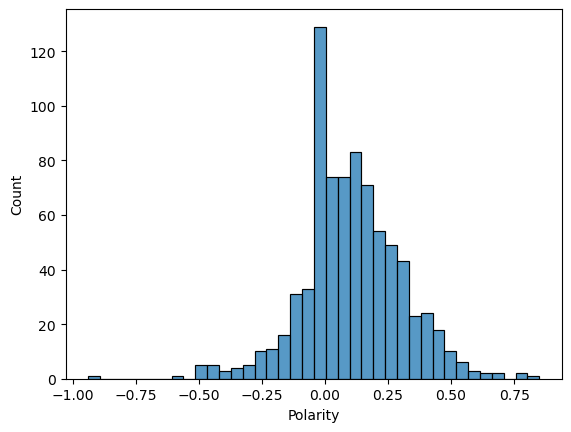

0.85


,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
401,2IhTNWQ9sFAr4WsfDpIy4s,Inseparable,Natalie Cole,149106,0,0.443,0.8550,0.194,0.000125,0.1800,-12.644,0.0366,125.145,0.258,en,0.80,0.833333
462,5M4yti0QxgqJieUYaEXcpw,Eventually,Tame Impala,318591,78,0.424,0.0158,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,en,0.80,1.000000
633,4Jn1rVpnfFfpuSBLDTNJv8,Proclamation,Gentle Giant,416866,39,0.514,0.1110,0.427,0.008120,0.1270,-14.254,0.0717,115.120,0.371,en,0.85,0.600000


In [4]:
sns.histplot(data['Polarity'])
plt.show()
print(data['Polarity'].max())

data[data['Polarity']>0.70]

In [5]:
## Creating dependent variables

bins = pd.IntervalIndex.from_tuples([
    (-1, -0.67),
    (-0.67, -0.34),
    (-0.34, 0),
    (0, 0.33),
    (0.33, 0.66),
    (0.66, 1)
])
n = len(bins)
data['sentiment'] = pd.cut(data['Polarity'],bins)

In [6]:
enc = OrdinalEncoder()
data['sentiment'] = enc.fit_transform(data[['sentiment']])[:,0]
data = data.drop(['language'], axis = 1)
data['sentiment'].unique()

array([3., 2., 4., 5., 1., 0.])

In [7]:
original_data = pd.read_excel('data/dataset.xlsx')

delete_text_before_lyrics = lambda x: x[x.find("Lyrics") + len("Lyrics"):] if x.find("Lyrics") != -1 else x

original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

original_data['language'] = original_data['lyrics'].apply(detect)  # Detect the language

original_data.head()

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,language
0,0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,"When you feel you're alone, cut off from this ...",en
1,1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,"\nTurn away\nIf you could, get me a drink\nOf ...",en
2,2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,\nA heart that's full up like a landfill\nA jo...,en
3,3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,"\n\nWell, if you wanted honesty\nThat's all yo...",en
4,4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,"\nShe sits up high, surrounded by the sun\nOne...",en


In [8]:
data_pre = data.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
data_pre = data_pre.drop_duplicates()

data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)
regexp = RegexpTokenizer('\w+')

data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
data_pre.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,"when you feel you're alone, cut off from this ...",en,"[when, you, feel, you, re, alone, cut, off, fr..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,"\nturn away\nif you could, get me a drink\nof ...",en,"[turn, away, if, you, could, get, me, a, drink..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,\na heart that's full up like a landfill\na jo...,en,"[a, heart, that, s, full, up, like, a, landfil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,"\n\nwell, if you wanted honesty\nthat's all yo...",en,"[well, if, you, wanted, honesty, that, s, all,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,"\nshe sits up high, surrounded by the sun\none...",en,"[she, sits, up, high, surrounded, by, the, sun..."


In [9]:

def tokenizing(data):
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    data_en = data[data['language']=='en']
    data_en['lyrics_token'] = data_en['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_en])
    data_es = data[data['language']=='es']
    data_es['lyrics_token'] = data_es['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_es])
    data_fr = data[data['language']=='fr']
    data_fr['lyrics_token'] = data_fr['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_fr])
    final = pd.concat([data_en,data_es, data_fr], axis = 0)
    return final

In [10]:
data_token = tokenizing(data_pre)

lemmatizer = WordNetLemmatizer()
data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
def replace_numbers(x):
    new_string = re.sub(pattern, '', x)
    return new_string
data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
data_token.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,feel alone cut cruel world instinct telling ru...,en,"[feel, alone, cut, cruel, world, instinct, tel..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,turn away could get drink water cause lip chap...,en,"[turn, away, could, get, drink, water, cause, ..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,heart full like landfill job slowly kill bruis...,en,"[heart, full, like, landfill, job, slowly, kil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,well wanted honesty say never want let go bett...,en,"[well, wanted, honesty, say, never, want, let,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,sits high surrounded sun one million branch lo...,en,"[sits, high, surrounded, sun, one, million, br..."


In [11]:
VARS = ['artist','duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','language','lyrics']
TARGET = ['sentiment']

x = data_token[VARS]
y = data_token[TARGET]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)
y_train = np.array(y_train, dtype=int) 
y_test = np.array(y_test, dtype=int) 
x_train = x_train.rename(columns = {'artist':'artist_song'})
x_test = x_test.rename(columns = {'artist':'artist_song'})

In [12]:
#### Handling text

vect = TfidfVectorizer(max_features = 1000,ngram_range=(1,3))
x_train_lyrics = pd.DataFrame(vect.fit_transform(x_train['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_train.index)
x_test_lyrics = pd.DataFrame(vect.transform(x_test['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_test.index)

x_train_final = pd.concat([x_train, x_train_lyrics], axis = 1)
x_test_final = pd.concat([x_test, x_test_lyrics], axis = 1)



In [13]:
EXCLUDED_VARS = ['lyrics']
x_train_df = x_train_final.loc[:,~x_train_final.columns.isin(EXCLUDED_VARS)]
x_test_df = x_test_final.loc[:,~x_test_final.columns.isin(EXCLUDED_VARS)]
x_train_df.head()

,artist_song,duration,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,across,act,actually,age,ago,ah,ah ah,ah ah ah,air,alan,album,alive,almost,alone,along,already,alright,also,also like,also likeembed,always,america,american,among,amor,angel,angela,another,answer,anyone,anything,ap,apart,april,april th,arm,around,art,artist,as,aseptember,asi,ask,asked,attention,august,august th,away,away give,away give away,ay,ba,baby,back,bad,bag,ball,band,bank,bar,battle,beach,bear,beat,beatles,beautiful,beauty,bebe,became,become,bed,begala,began,begin,behind,believe,bell,best,better,beyond,bien,big,bill,bird,bit,bitch,black,blood,bloody,bloom,blow,blue,bob,body,bone,book,born,box,boy,brain,break,breath,bridge,bright,bring,broke,broken,brother,brought,brown,business,buy,ca,call,call call,called,came,camera,camp,cannot,captain,car,care,carlson,carti,case,cash,cat,catch,cause,certain,chair,chance,change,check,child,chorus,chris,christmas,chuck,city,class,classic,clean,clear,close,clothes,cloud,club,coco,coffee,cold,come,coming,comme,control,cool,corner,could,country,course,cover,crazy,cried,crosstalk,crowd,cry,cut,da,da da,da da da,dad,daddy,damn,dan,dance,dancing,dark,darling,dat,daughter,david,day,de,dead,deal,dear,death,december,decent,decent strong,deep,demo,devil,diamond,die,died,different,dirty,disco,dj,do,doctor,dog,doll,done,door,dr,dream,dress,drink,drive,drop,du,du du,du du du,dude,ear,early,earn,earth,east,easy,eat,ed,eh,eh eh,either,el,element,elliot,else,em,embed,empty,end,english,english translation,enough,er,etait,etre,even,evening,ever,every,everybody,everyone,everything,experience,ext,ey,eye,face,fact,fair,fait,fall,falling,family,famous,far,fast,father,fear,feat,feat joel,feat joel sattler,featuring,february,february th,feel,feel like,feeling,fell,fellow,felt,field,fight,figure,finally,find,fine,finger,fire,first,five,flame,floor,flow,flower,fly,fool,foot,force,forever,forget,form,forth,found,four,free,fresh,friday,friend,front,ft,fuck,fuckin,fucking,full,fun,future,game,garden,gave,general,gentleman,get,getting,ghost,giant,gillis,girl,give,give away,give away give,given,glass,go,go go,god,going,gold,golden,gone,gonna,good,goodbye,got,gotta,grand,great,greatest,green,ground,group,guess,gun,gusta,guy,hail,hair,half,hall,hand,happen,happy,hard,harlem,hat,hate,head,hear,heard,heart,heaven,heavy,held,hell,hello,help,hey,high,hill,hip,history,hit,ho,hold,holding,hole,holiday,holy,home,hop,hope,horror,horse,hot,hotel,hour,house,however,human,hundred,hurt,ice,idea,ii,indeed,infinity,inside,int,island,jack,james,january,january rd,january st,january th,jay,jazz,jimmy,job,joe,joel,joel sattler,john,joy,judge,july,july th,june,june th,kanye,kanye west,keep,key,kid,kill,kind,king,kiss,knee,knew,know,known,la,la la,la la la,lady,land,large,lars,last,late,later,laugh,laughter,lawrence,lay,le,lead,leaf,least,leave,leaving,led,left,leg,let,let go,letter,li,lie,life,light,light decent,like,likeembed,lil,line,lionel,lip,listen,little,live,liveget,liveget ticket,liveget ticket low,living,lo,lonely,long,look,look like,looked,looking,lord,lose,lost,lot,lou,loud,love,love love,lovely,lover,low,low you,low you might,lucky,lyric,ma,mac,macbeth,machine,mad,made,magic,main,make,making,malachy,mami,man,manny,many,mar,march,march th,margaret,marianela,marianela marianela,marianela marianela marianela,mark,martin,master,matter,max,may,may th,maybe,mean,meant,meet,meme,memory,men,met,mi,michael,middle,might,might also,might also like,might also likeembed,mile,milk,million,mind,mine,minute,miranda,miss,mma,modern,moment,money,monster,month,moon,morel,morning,mother,motion,mountain,mouth,move,movement,movie,mr,mr bloom,much,murder,music,must,na,na na,na na na,name,nation,natural,nature,nd,near,need,negro,never,new,new york,news,next,nice,nigga,night,nobody,noche,norma,north,note,nothing,november,number,object,ocean,october,october th,office,oh,oh oh,oh oh oh,oh yeah,ok,okay,old,omar,one,ooh,ooh ooh,oo

In [1]:
### Modeling
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
CAT_VARS = ['artist_song','language']
x_train_df[CAT_VARS] = x_train_df[CAT_VARS].astype('category')
x_test_df[CAT_VARS] = x_test_df[CAT_VARS].astype('category')
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model_lgbm = lgb.LGBMClassifier(categorical_feature = CAT_VARS)
model_xgb = XGBClassifier(enable_categorical=True)
model_rf = RandomForestClassifier(random_state=123)
model_xgb.fit(x_train_df, y_train)
model_lgbm.fit(x_train_df, y_train)
model.fit(x_train_df, y_train)
model_rf.fit(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)], y_train)

NameError: name 'x_train_df' is not defined

In [ ]:
esc = StandardScaler()
x_train_esc = esc.fit_transform(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])
x_test_esc = esc.transform(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
model_nn = MLPClassifier()
model_nn.fit(x_train_esc, y_train)


In [ ]:
preds_catboost = model.predict(x_test_df)
preds_probas_catboost = model.predict_proba(x_test_df)
preds_probas_train_catboost = model.predict_proba(x_train_df)

preds_lgbm = model_lgbm.predict(x_test_df)
preds_probas_lgbm = model_lgbm.predict_proba(x_test_df)
preds_probas_train_lgbm = model_lgbm.predict_proba(x_train_df)

preds_xgb = model_xgb.predict(x_test_df)
preds_probas_xgb = model_xgb.predict_proba(x_test_df)
preds_probas_train_xgb = model_xgb.predict_proba(x_train_df)

preds_rf = model_rf.predict(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_rf = model_rf.predict_proba(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_train_rf = model_rf.predict_proba(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])

preds_nn  = model_nn.predict(x_test_esc)
preds_probas_nn  = model_nn.predict_proba(x_test_esc)
preds_probas_train_rf = model_nn.predict_proba(x_train_esc)

print(accuracy_score(preds_catboost, y_test))
print(accuracy_score(preds_lgbm, y_test))
print(accuracy_score(preds_xgb, y_test))
print(accuracy_score(preds_rf, y_test))
print(accuracy_score(preds_nn, y_test))

In [ ]:
cm_catboost = confusion_matrix(preds_catboost, y_test)
disp = ConfusionMatrixDisplay(cm_catboost)
disp.plot()
plt.show()

In [ ]:
## Stacked model


df_probas_train = pd.concat([pd.DataFrame(preds_probas_train_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

df_probas_test = pd.concat([pd.DataFrame(preds_probas_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

linear_model = LogisticRegression(penalty='l2', solver = 'saga', C = 0.05)
nn_ensamble = MLPClassifier()
nn_ensamble.fit(df_probas_train, y_train)
preds = nn_ensamble.predict(df_probas_test)
accuracy_score(preds, y_test)


In [ ]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.00001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 4000),
        # Add other hyperparameters as needed
    }

    model = XGBClassifier(enable_categorical=True, *params)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=40)

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 4000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),

        # Add other hyperparameters as needed
    }

    model = CatBoostClassifier(**params, silent=True, cat_features=CAT_VARS)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

In [ ]:
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model.fit(x_train_df, y_train)
preds_catboost = model.predict(x_test_df)
print(accuracy_score(preds_catboost, y_test))

In [ ]:
#### Recommendation system

user_input = " I want to go to the gym"



def analyze_sentiment(text, language_model):
    doc = language_model(text)
    text = " ".join([token.lemma_ for token in doc if not token.is_stop])

    blob = TextBlob(text)
    
    return blob.sentiment


polarity = analyze_sentiment(user_input, nlp_en).polarity

In [ ]:
a = pd.cut(np.array([polarity]),bins)
enc.transform(np.array(a[0]).reshape(-1,1))-1


In [ ]:
def text_preprocess(text):
    ## Language detection
    lang = detect(text)
    
    ## Replace numbers
    text = replace_numbers(text)
    ## Replacing characters
    text = text.lower()
    text = unidecode(text)
    ## Tokenization
    if lang in ['en','es','fr']:
        tokens = regexp.tokenize(text)

    
    ## Stop words
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    if lang == 'en':
        new_tokens = [i for i in tokens if i not in stopwords_en]
    elif lang == 'es':
        new_tokens = [i for i in tokens if i not in stopwords_es]
    elif lang == 'fr':
        new_tokens = [i for i in tokens if i not in stopwords_fr]
    ## Join text

    full_text = ' '.join(new_tokens)
    
    return full_text

cleaned_text = text_preprocess(user_input)
user_matrix = vect.transform([cleaned_text]).toarray()
song_matrix = vect.transform(x_train['lyrics']).toarray()
cosine_similarity(user_matrix, song_matrix)

In [ ]:
def predict(dataset, original_data, enc, model ):
    

    original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

    original_data['language'] = original_data['lyrics'].apply(detect) 
    data_pre = dataset.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
    data_pre = data_pre.drop_duplicates()

    data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

    data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
    data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)

    data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
    data_token = tokenizing(data_pre)
    data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))
    data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
    df_text = pd.DataFrame(enc.transform(data_token['lyrics']).toarray(), columns  = enc.get_feature_names_out(), index = data_token.index)
    df_final = pd.concat([data_token, df_text], axis = 1)
    df_final = df_final.loc[:,~df_final.columns.isin(EXCLUDED_VARS)]
    df_final[CAT_VARS] = df_final[CAT_VARS].astype('category')
    df_final = df_final[VARS]
    df_final['predict_cat'] = model.predict(df_final)
    return df_final

In [ ]:
predict(data, original_data, vect, model)